初步实验结果，与上一个实验的区别主要在于数据集的不同


这个数据集的量和难度都要大很多


由于这个数据集是彩色图片数据，可以先转为灰度图以降维（也可以不做，但是速度会慢很多，而且准确度不一定会更高）

In [60]:
import os
import cv2 as cv
import pandas as pd
import numpy as np

data_X = {}
data_y = {}
for root, dirs, files in os.walk('./Face_Recognition_Data/'):
    for name in files:
        path = os.path.join(root, name)
        dataset = path.split('/')[2]
        category = path.split('/')[-2]
        img = cv.imread(path, cv.IMREAD_GRAYSCALE)
        try:
            img.shape
        except:
            continue
        img = np.ravel(img)
        if dataset not in data_X:
            data_X[dataset] = []
            data_y[dataset] = []
        data_X[dataset].append(img)
        data_y[dataset].append(category)
for k, v in data_X.items():
    data_X[k] = pd.DataFrame(data=v)
for k, v in data_y.items():
    data_y[k] = pd.DataFrame(data=v)

In [70]:
import matplotlib.pyplot as plt
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


def title(y_pred, y_test, i):
    pred_name = y_pred[i]
    true_name = y_test[i]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

PCA降维，SVM分类


faces95数据集的效果较差，别的数据集的识别率都接近1

===================grimace===================
fit done in 2.349s
transform done in 0.149s
train done in 0.047s
              precision    recall  f1-score   support

         and       1.00      1.00      1.00         3
         ant       1.00      1.00      1.00         6
         chr       1.00      1.00      1.00         5
         dah       1.00      1.00      1.00         8
         dav       1.00      1.00      1.00         3
         den       1.00      0.83      0.91         6
        glen       1.00      1.00      1.00         7
         ian       1.00      1.00      1.00         2
         jer       1.00      1.00      1.00         5
        john       1.00      1.00      1.00         6
         lib       1.00      1.00      1.00         7
        mike       1.00      1.00      1.00         2
         pat       1.00      1.00      1.00         1
         sar       1.00      1.00      1.00         1
         ste       1.00      1.00      1.00         3
         stu       0.50 

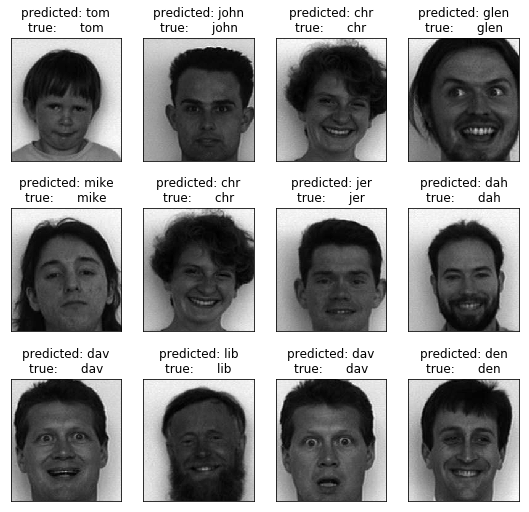

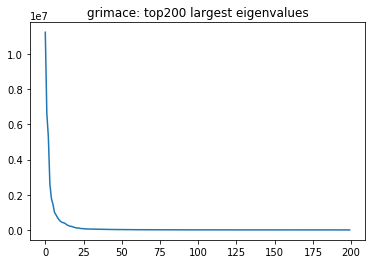

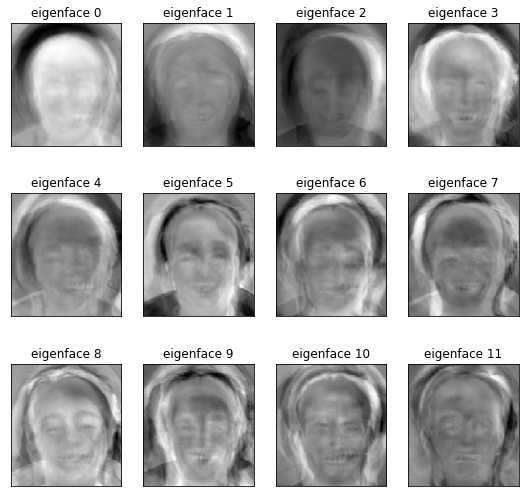

===================faces95===================
fit done in 3.219s
transform done in 0.369s
train done in 0.545s
              precision    recall  f1-score   support

      adhast       0.75      1.00      0.86         3
      ajbake       1.00      1.00      1.00         1
      apapou       1.00      0.50      0.67         4
      apdavi       0.00      0.00      0.00         4
      ardper       1.00      1.00      1.00         3
      awjsud       1.00      0.50      0.67         4
      boylee       1.00      1.00      1.00         1
      bschap       1.00      0.67      0.80         3
      cadugd       1.00      0.50      0.67         2
      cdlarg       1.00      0.50      0.67         4
      cfloro       0.50      1.00      0.67         1
      cladam       0.00      0.00      0.00         1
       cywan       0.67      0.67      0.67         3
      dakram       1.00      0.50      0.67         4
       damvo       1.00      0.80      0.89         5
       darda       1.00 

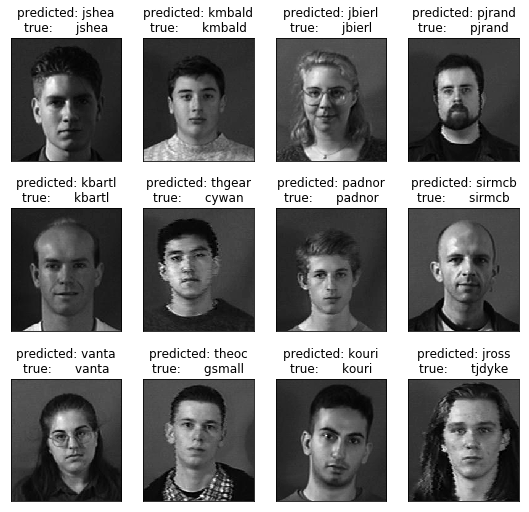

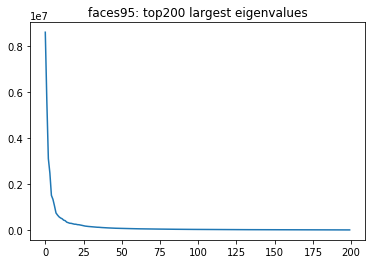

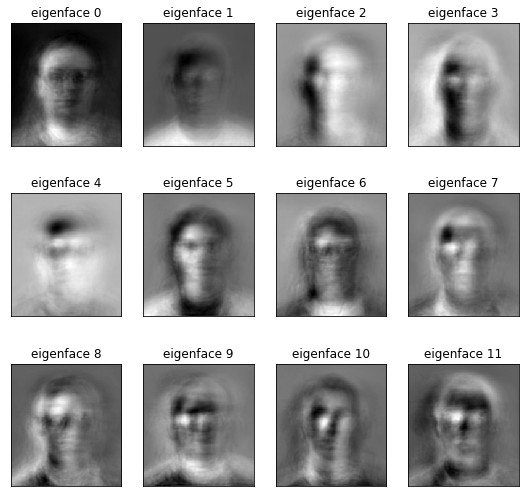

===================faces94===================
fit done in 6.345s
transform done in 0.806s
train done in 1.690s
              precision    recall  f1-score   support

     9326871       1.00      1.00      1.00         5
     9332898       1.00      1.00      1.00         3
     9336923       1.00      1.00      1.00         4
     9338446       1.00      1.00      1.00         4
     9338454       1.00      1.00      1.00         4
     9338462       1.00      1.00      1.00         5
     9338489       1.00      1.00      1.00         4
     9338497       1.00      1.00      1.00         1
     9338519       1.00      1.00      1.00         4
     9338527       1.00      1.00      1.00         2
     9338535       1.00      1.00      1.00         1
     9338543       1.00      1.00      1.00         3
     9414649       1.00      1.00      1.00         5
     9416994       1.00      1.00      1.00         5
      admars       1.00      1.00      1.00         5
      ahodki       1.00 

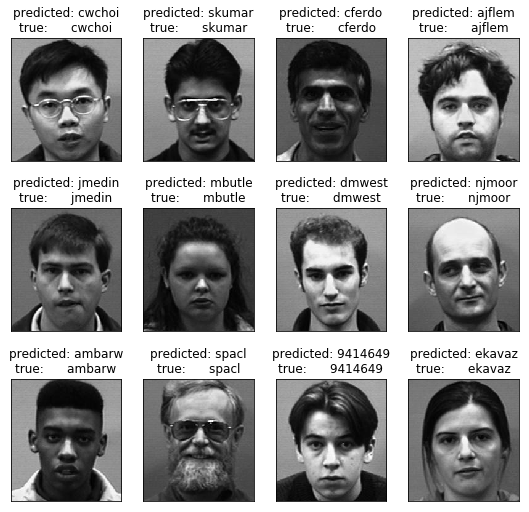

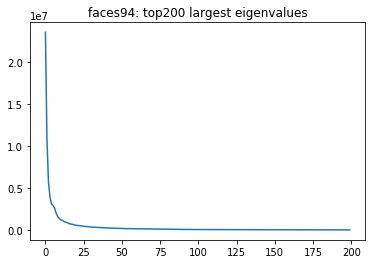

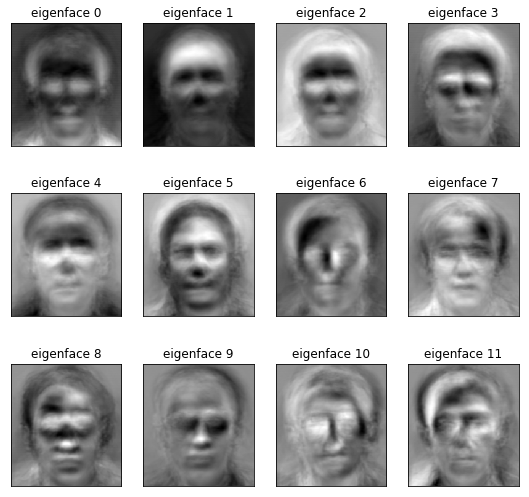

===================faces96===================
fit done in 6.716s
transform done in 0.822s
train done in 2.247s
              precision    recall  f1-score   support

     9540474       1.00      1.00      1.00         2
     9540504       1.00      1.00      1.00         7
     9540512       1.00      1.00      1.00         7
     9540547       1.00      1.00      1.00         4
     9540563       1.00      1.00      1.00         7
     9540601       1.00      1.00      1.00         7
     9540628       1.00      1.00      1.00         4
     9540636       1.00      1.00      1.00         4
     9540644       1.00      1.00      1.00         6
     9540652       1.00      1.00      1.00         3
     9540687       1.00      1.00      1.00         4
     9540695       0.75      1.00      0.86         3
     9540709       1.00      1.00      1.00         3
     9540717       1.00      1.00      1.00         2
     9540725       1.00      1.00      1.00         2
     9540733       1.00 

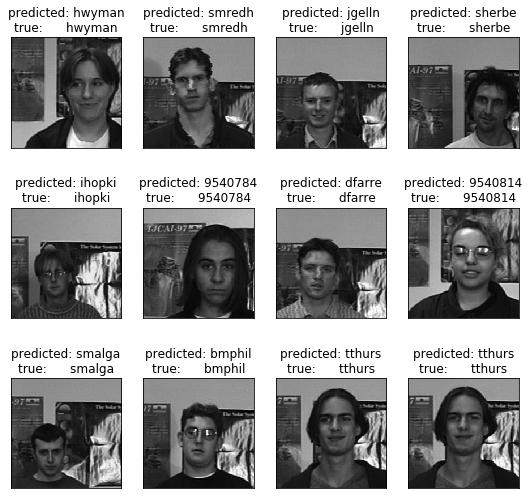

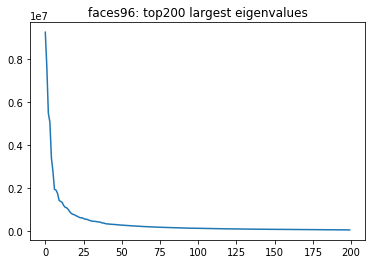

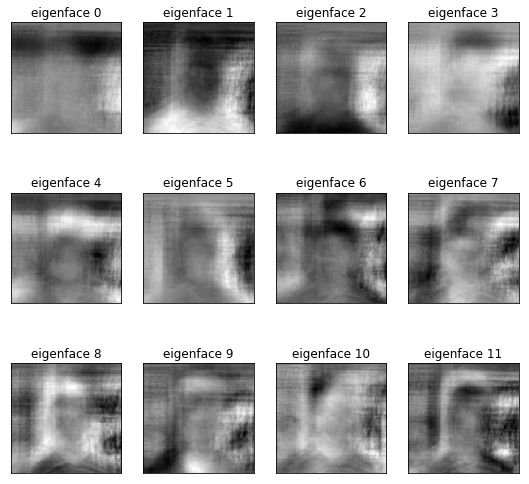

In [99]:
from copy import deepcopy
from sklearn.model_selection import train_test_split
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

for dataset in data_X:
    print('===================' + dataset + '===================')
    
    X = deepcopy(data_X[dataset])
    y = deepcopy(data_y[dataset])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    n_components = 200

    t0 = time()
    pca = PCA(n_components=n_components, svd_solver='randomized',
              whiten=True).fit(X_train)
    print("fit done in %0.3fs" % (time() - t0))

    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("transform done in %0.3fs" % (time() - t0))


    t0 = time()
    # param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
    #               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    # clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
    #                    param_grid, cv=5)
    clf = SVC()
    clf = clf.fit(X_train_pca, y_train)
    print("train done in %0.3fs" % (time() - t0))
    # print("Best estimator found by grid search:")
    # print(clf.best_estimator_)

    y_pred = clf.predict(X_test_pca)
    print(classification_report(y_test, y_pred))
    
    
    h = 200
    w = 180
    if dataset == 'faces96':
        h = 196
        w = 196

    y_test = y_test.values.ravel()
    prediction_titles = [title(y_pred, y_test, i)
                         for i in range(y_pred.shape[0])]

    plot_gallery(np.array(X_test), prediction_titles, h, w)
    
    plt.figure()
    plt.plot(range(n_components), pca.explained_variance_)
    plt.title(dataset + ': top' + str(n_components) + ' largest eigenvalues', size=12)
    
    eigenfaces = pca.components_.reshape((n_components, h, w))
    eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
    plot_gallery(eigenfaces, eigenface_titles, h, w)

    plt.show()

LDA降维并分类


同样n_components下，比PCA效果稍好

In [101]:
from copy import deepcopy
from sklearn.model_selection import train_test_split
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

for dataset in data_X:
    print('===================' + dataset + '===================')
    
    X = deepcopy(data_X[dataset])
    y = deepcopy(data_y[dataset])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    n_components = 200

    t0 = time()
    lda = LinearDiscriminantAnalysis(n_components=n_components).fit(X_train, y_train)
    print("fit done in %0.3fs" % (time() - t0))

    y_pred = lda.predict(X_test)
    print(classification_report(y_test, y_pred))

===================grimace===================
fit done in 3.224s
              precision    recall  f1-score   support

         and       1.00      1.00      1.00         3
         ant       1.00      1.00      1.00         6
         chr       1.00      1.00      1.00         5
         dah       1.00      1.00      1.00         8
         dav       1.00      1.00      1.00         3
         den       1.00      1.00      1.00         6
        glen       1.00      1.00      1.00         7
         ian       1.00      1.00      1.00         2
         jer       1.00      1.00      1.00         5
        john       1.00      1.00      1.00         6
         lib       1.00      1.00      1.00         7
        mike       1.00      1.00      1.00         2
         pat       1.00      1.00      1.00         1
         sar       1.00      1.00      1.00         1
         ste       1.00      1.00      1.00         3
         stu       1.00      1.00      1.00         2
         tom    

fit done in 35.531s
              precision    recall  f1-score   support

     9540474       1.00      1.00      1.00         2
     9540504       1.00      1.00      1.00         7
     9540512       1.00      1.00      1.00         7
     9540547       1.00      1.00      1.00         4
     9540563       1.00      1.00      1.00         7
     9540601       1.00      1.00      1.00         7
     9540628       1.00      1.00      1.00         4
     9540636       1.00      1.00      1.00         4
     9540644       1.00      1.00      1.00         6
     9540652       1.00      1.00      1.00         3
     9540687       1.00      1.00      1.00         4
     9540695       1.00      1.00      1.00         3
     9540709       1.00      1.00      1.00         3
     9540717       1.00      1.00      1.00         2
     9540725       1.00      1.00      1.00         2
     9540733       1.00      1.00      1.00         5
     9540741       1.00      1.00      1.00         3
     95